# Student Performance Dataset

# Objective: Identify key factors influencing student academic performance.

# Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/sample_data/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [35]:
# Step 1: Setup and Data Preparation

# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())


Dataset Overview:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [36]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [37]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [38]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [39]:
# Handle missing values (if any)
# Example: Fill missing numerical values with median
numerical_features = ['math score', 'reading score', 'writing score']
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [40]:
# Example: Fill missing categorical values with mode
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_features:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


Visualizing Numerical Feature Distributions:


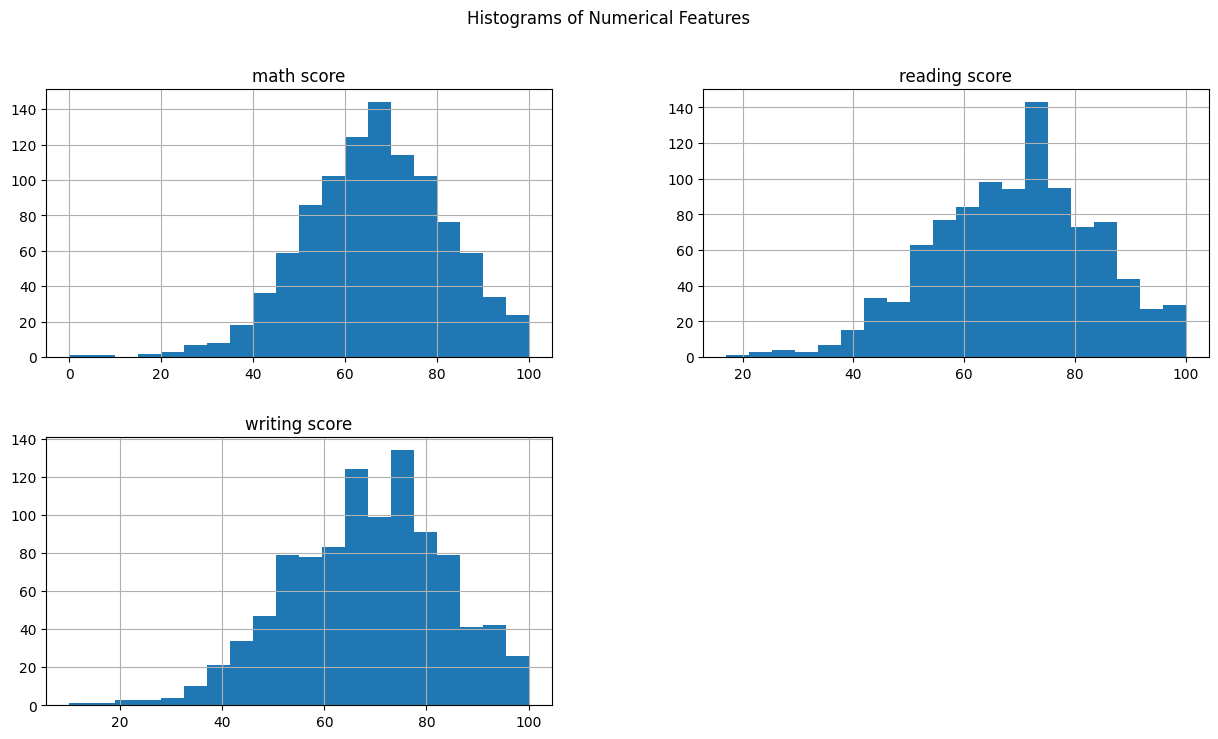

In [41]:
# Step 2: Exploratory Data Analysis (EDA)

# Visualize distributions of numerical features
print("\nVisualizing Numerical Feature Distributions:")
df[numerical_features].hist(bins=20, figsize=(15, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

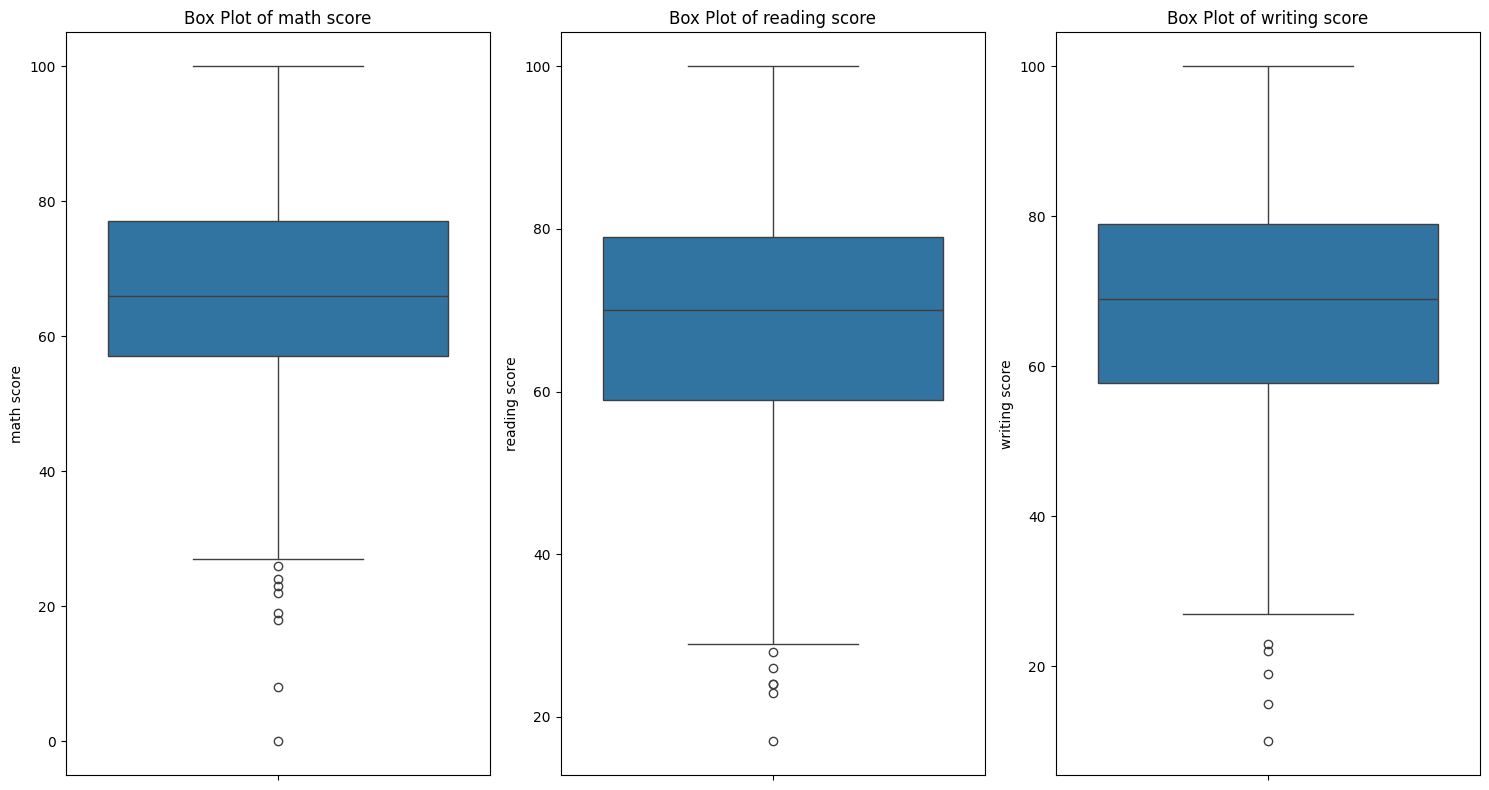

In [42]:
# Box plots for numerical features to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

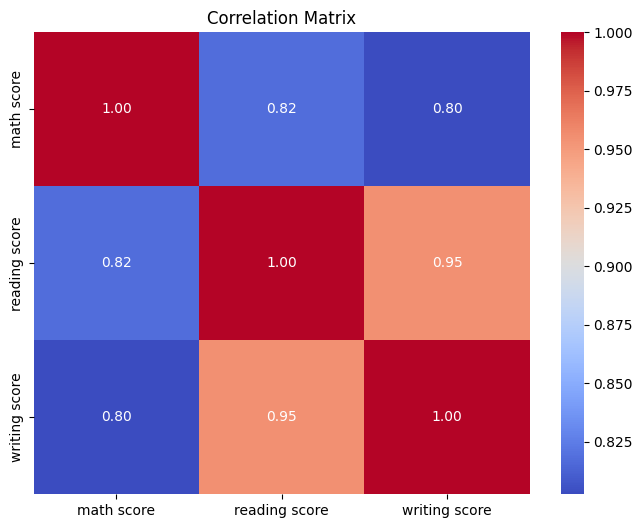

In [43]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


Analyzing Categorical Features:

Frequency Table for gender:
gender
female    518
male      482
Name: count, dtype: int64


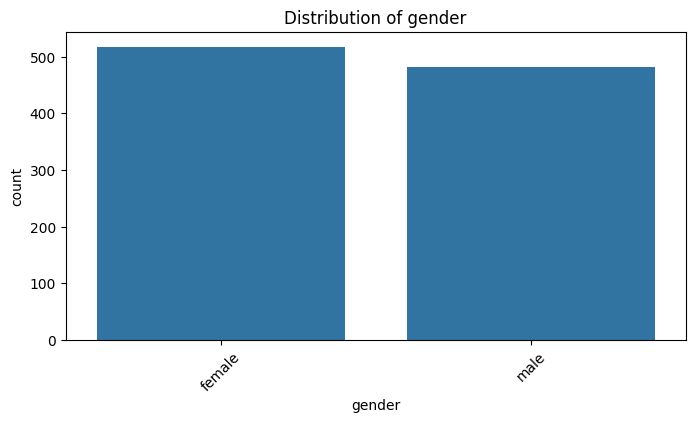


Frequency Table for race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


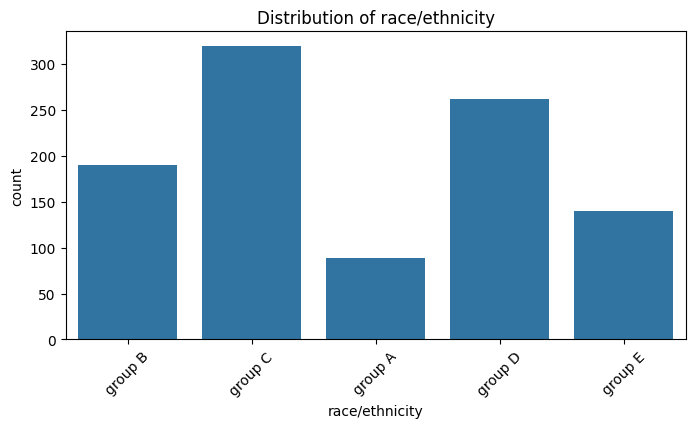


Frequency Table for parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


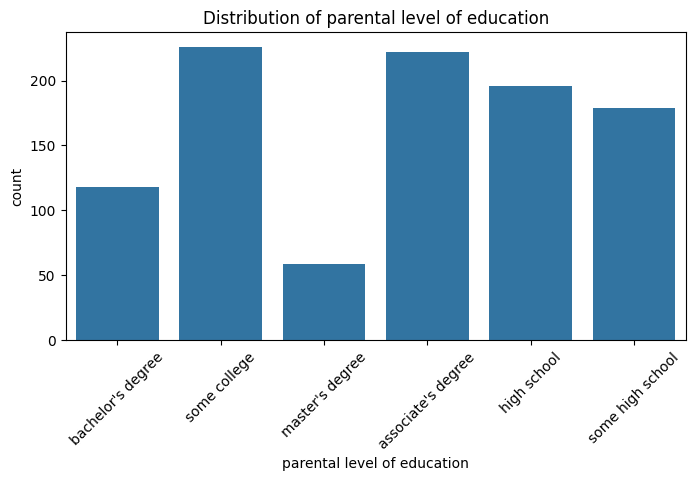


Frequency Table for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


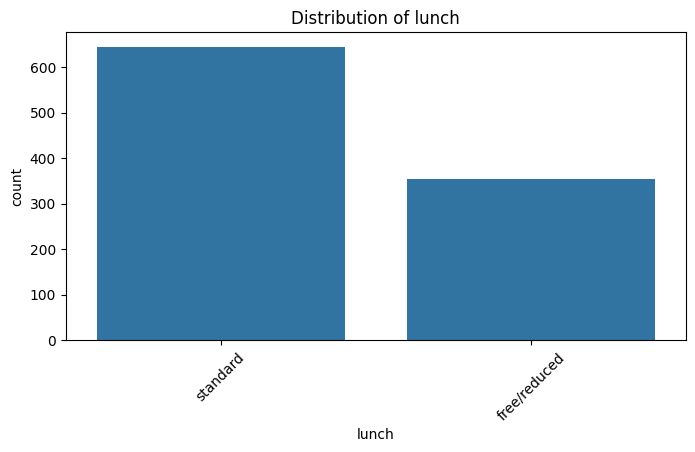


Frequency Table for test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64


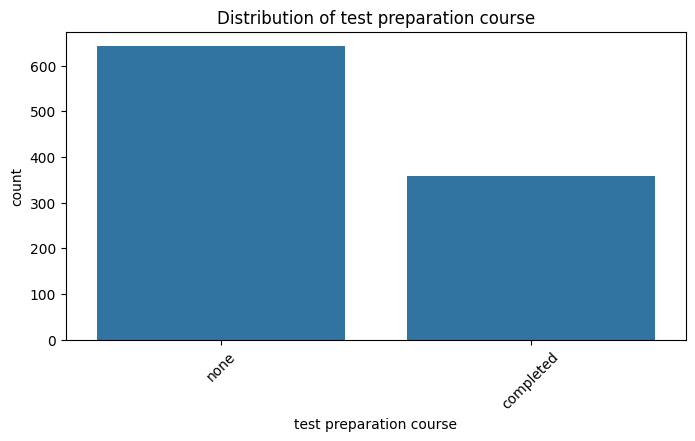

In [44]:
# Analyze categorical features
print("\nAnalyzing Categorical Features:")
for column in categorical_features:
    print(f"\nFrequency Table for {column}:")
    print(df[column].value_counts())

    # Bar plot for categorical variables
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

In [45]:
# Step 3: Preprocessing Steps

# Encode categorical variables using one-hot encoding
print("\nEncoding Categorical Variables:")
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the preprocessed dataset
print("\nPreprocessed Dataset:")
print(df_encoded.head())


Encoding Categorical Variables:

Preprocessed Dataset:
   math score  reading score  writing score  gender_male  \
0    0.390024       0.193999       0.391492        False   
1    0.192076       1.427476       1.313269        False   
2    1.577711       1.770109       1.642475        False   
3   -1.259543      -0.833899      -1.583744         True   
4    0.653954       0.605158       0.457333         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                   

In [46]:
# Step 4: Summary of Insights

# Key Observations
print("\nKey Observations:")
print("1. Strong positive correlations exist between math score, reading score, and writing score.")
print("2. Gender, parental education level, lunch type, and test preparation course significantly influence scores.")
print("3. Students who completed the test preparation course tend to perform better across all subjects.")


Key Observations:
1. Strong positive correlations exist between math score, reading score, and writing score.
2. Gender, parental education level, lunch type, and test preparation course significantly influence scores.
3. Students who completed the test preparation course tend to perform better across all subjects.



Model Evaluation:
Mean Squared Error (MSE): 29.10
R-squared (R2): 0.88


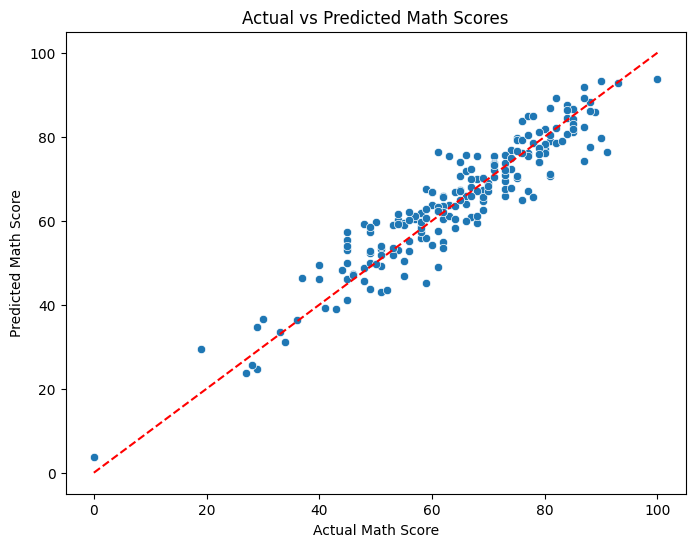

In [47]:
# Step 5: Build and Train the Linear Regression Model

# Create a pipeline with preprocessing and regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.show()